$ \newcommand{\pd}[2]{ \frac{\partial #1}{\partial #2} }
\newcommand{\od}[2]{\frac{d #1}{d #2}}
\newcommand{\td}[2]{\frac{D #1}{D #2}}
\newcommand{\ab}[1]{\langle #1 \rangle}
\newcommand{\bss}[1]{\textsf{\textbf{#1}}}
\newcommand{\ol}{\overline}
\newcommand{\olx}[1]{\overline{#1}^x}
$

# Advection, Diffusion, and Conservation Laws

## Basin Scale Budgets

As an introduction to this somewhat technical topic, we will first examine the _basin scale_ budgets of _mass, heat, and salt_. This are usually a bit more intuitive to understand.

Consider the volume shown below. It shows the side view of an ocean basin (like the North Atlantic) bounded at the bottom by the sea floor, at the top by the ocean surface, and at the southern edge by an open boundary through which water can flow. The central question here is, _what controls the rate of change of total mass, heat content, and salt inside this volume_?


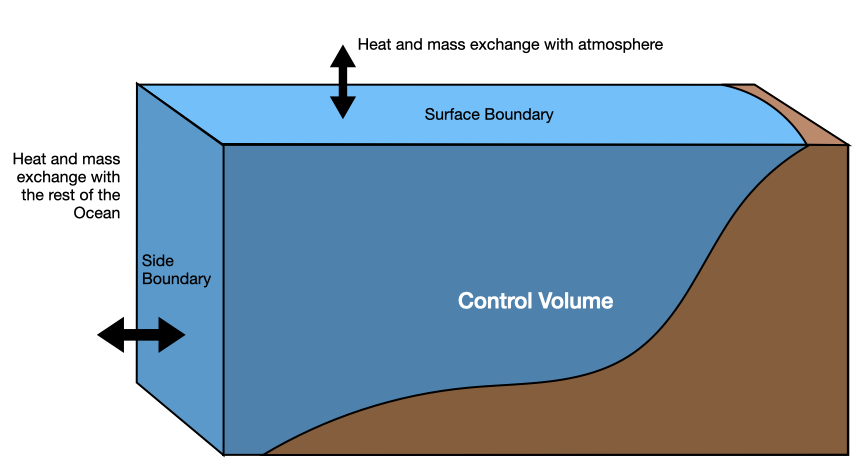

In [1]:
from IPython.display import Image
Image('images/3D_Basin_Diagram.png')

### Mass Conservation

Let $M$ be the total mass of the ocean in this basin. The rate of change of mass is given by

$$ \od{M}{t} = F_m^{surf} + F_{m}^{side} $$

The two terms on the right represent the mass flux into the volume at the surface and the mass flux into the volume at the side boundary. (Note that the sign coventions we chose for the $F_m$'s was arbitrary: we definied them such that mass will increase if they are positive. This choice dictates the sign in what follows.) At this point the equation is a bit obvious, but let's write what each term is a bit more explicity.

The total mass is given by the integral of the density over the volume (denoted by $V$):

$$ M = \iiint_V \rho dV \ . $$

The mass flux at the surface is given by the integral over the surface of evaporation ($E$, measured in m/s), precipitation ($P$) and runoff ($R$), multiplied by the density of fresh water:

$$ F_m^{surf} = -\iint_{surf} \rho_{fw} (E - P - R) dA \ . $$

The mass flux at the open boundary is given by the area integral of the velocity $\mathbf{u}$ times the density, in the direction normal to the boundary:

$$ F_m^{side} = - \iint_{side} \rho \mathbf{u} \cdot \mathbf{dA} \ .$$

Here $\mathbf{dA}$ is the vector area element which points _out_ of the volume normal to the boundary.

This equation suggests several different possibilities:
- If E-P is _not_ in balance with the net E-P-R, then the total ocean mass in the basin has to increase or decrease. 
- In steady state (i.e. time derivative is zero), the net evaporation minus precipitation must balance the mass inflow at the boundary.

It is very common in oceanography to take the mass of the ocean, or of a basin, as constant in time. Although the ocean mass does change slightly on various timescales (most notably through the formation and melting of terrestrial ice sheets), these changes are extremely slight compared to the total ocean mass. In this case, we find

$$ F_m^{surf} = - F_{m}^{side} $$


### Mass Conservation in Boussinesq Approximation

The Boussisesq approximation is that density variations $\delta \rho$ are very small compared to the background density $\rho_0$, i.e.

$$ \rho = \rho _0 + \delta \rho \ ; \ \ |\delta \rho| \ll \rho_0 \ . $$

This approximation simplifies conservations equations considerably. The mass can now be approximated as

$$ M \simeq \iiint_V \rho_0 dV = \rho_0 \iiint_V dV \ . $$

Since $\rho_0$ is a constant, we can divide it out of the mass equation and work with volume instead:

$$ V =  \iiint_V dV \ . $$

The mass equation becomes a volume equation:

$$ \begin{align}
\od{V}{t} =& \frac{F_m^{surf}}{\rho_0} + \frac{F_{m}^{side}}{\rho_0} \\ 
 =& F_v^{surf} + F_v^{side}
\end{align} $$

with

$$ F_v^{surf} = -\frac{\rho_{fw}}{\rho_0} \iint_{surf} (E - P - R) dA $$

and

$$ F_v^{side} = - \iint_{side} \mathbf{u} \cdot \mathbf{dA} \ . $$



### Heat Conservation

The total heat content of the basin is given by

$$ H = c_p^0 \iiint_V \rho  \Theta dV \ . $$

where $\Theta$ is the conservative temperature (proportional to potential enthalpy). 
Some would say that that $\Theta$ should be measured in Kelvins. However, the [first law of thermodynamics](https://en.wikipedia.org/wiki/First_law_of_thermodynamics) only describes the _changes_ in heat content of a system; the absolute value of $H$ is meaningless.

The rate of change of heat content depends only on external fluxes into the system:

$$ \od{H}{t} = F_H^{surf} + F_H^{side} \ . $$

The surface flux is the air-sea flux $Q$ we discussed earlier, plus the advection of heat by the evaporating / precipitating water:

$$ F_H^{surf} = \iint_{surf} Q dA - c_p^0 \iint_{surf} \rho_{fw} \Theta (E - P - R) dA $$

where $Q$ is defined as positive for downward heat flux. The second term represents the advetion of heat into / out of the ocean surface by evaporating / precipitating water. Neglecting diffusive fluxes (for now), the flux through the side is

$$ F_H^{side} = -  c_p^0 \iint \mathbf{u} \rho \Theta \cdot \mathbf{dA} $$

#### Simultaneous Changes of Heat and Mass

It becomes difficult to reason about heat content when the mass of the system is also changing. For this reason, we will mostly talk about heat transport in situations where the total ocean mass, or the mass of an individual basin under consideration, is constant in time (i.e. $d M / d t = 0$).

If the mass of the system is changing, is may be useful to distinguish from the mean temperature of the body $\overline{\Theta}$ and a fluctuation from this mean $\Theta'$. Expanding $H$, we obtain:

$$
\od{H}{t} = \od{}{t} \left [ c_p^0 \iiint_V \rho (\overline{\Theta} + \Theta') dV \right ]
=  c_p^0 \od{}{t} \iiint_V \rho \Theta' dV + c_p^0 \overline{\Theta} \od{M}{t}\ .
$$

We make the same substitution in the surface flux


$$ F_H^{surf} = \iint_{surf} Q dA - c_p^0 \iint_{surf} \rho_{fw} \Theta'(E - P - R) dA -
c_p^0 \overline{\Theta} \iint_{surf} \rho_{fw} (E - P - R) $$

and the side flux

$$ F_H^{side} = -  c_p^0 \iint_{side} \mathbf{u} \rho \Theta' \cdot \mathbf{dA} -
c_p^0 \overline{\Theta} \iint_{side} \mathbf{u} \rho \cdot \mathbf{dA}$$

Summing all these, we can obtain a formula of the form

$$
\od{H'}{t} = F_H^{'surf} + F_H^{'side} + c_p^0 \overline{\Theta} (\od{M}{t} - F_m^{surf} - F_m^{side})
$$


Through mass conservation, the final term proprtional to $\overline{\Theta}$ cancels out to zero.
All that remains are the terms proportional to $\Theta'$, which we have defined as

\begin{align}
H' &= c_p^0 \od{}{t} \iiint_V \rho \Theta' dV \\
F_H^{'surf} &= \iint_{surf} Q dA - c_p^0 \iint_{surf} \rho_{fw} \Theta'(E - P - R) dA \\
F_H^{'side} &= -  c_p^0 \iint_{side} \mathbf{u} \rho \Theta' \cdot \mathbf{dA} \ .
\end{align}

This gives us a template to follow when trying to calculate heat budgets for bodies whose mass is changing: redefine the temperature as relative to the mean temperature.
This form of the budget also reveals something important: even with $dM/dt = 0$, the magnitude of the surface and side fluxes is indeterminate up to a constant.
We can add _any_ constant temperature to these components, and it will cancel out in the heat budget.
Attempting to break down the heat budget into a sum of different components can lead to spurious conclusions, since these individual components potentially depend on an arbitrary reference temperature.
We can avoid this indeterminacy only if:
- There are no net mass fluxes at all through any of the boundaries ($F_m^{surf} = F_m^{side} = 0$) OR
- We reference all our temperature measurements at all boundaries to the same constant and, using the same reference temperature, cancel the terms related to net mass flux.

### Heat Conservation in Boussinesq Approximation

Under the Boussinesq approximation,

$$ H = c_p^0 \rho_0 \iiint_V \Theta dV \ . $$

The fluxes simplify to

$$ F_H^{surf} = \iint_{surf} Q dA - c_p^0 \frac{ \rho_{fw} }{\rho_0} \iint_{surf} \Theta (E - P - R) dA $$

and

$$ F_H^{side} = -  c_p^0 \rho_0 \iint_{side} \mathbf{u} \Theta \cdot \mathbf{dA} \ . $$

Volume conservation ($d V / dt = 0$) accompanies heat conservation to render it independent of $\Theta_{ref}$.

### Salt and Freshwater Conservation

Since negligible salt is exchanged with the atmosphere (or sea ice), the basin-scale budget for salinity is

$$\mathcal{S} = \iiint_V \rho S dV $$

$$ \frac{d \mathcal{S}}{dt} = F_S^{side} $$

with

$$ F_S^{side} = -  \iint_{side} \mathbf{u} \rho S \cdot \mathbf{dA} \ . $$

In steady state this simply states that the net salt flux through a closed section is zero.

We can construct the freshwater balance by subtracting the mass balance. Assuming steady state, we find

$$ F_M^{side} - F_S^{side} = -F_M^{surf}. $$

This equation can be simplified to

$$ F_{fw}^{side} = - \iint_{side} \mathbf{u} \rho(1 - S) \cdot \mathbf{dA} 
   = \iint_{surf} \rho_{fw} (E - P - R) dA $$
   
which represents the next freshwater flux through the basin. In the Boussinesq approximation, we have

$$ F_{fw}^{side} = - \rho_0 \iint_{side} \mathbf{u} (1 - S) \cdot \mathbf{dA} 
   = \rho_{fw}  \iint_{surf}(E - P - R) dA $$
   
For a basin with a closed volume budget ($F_V^{side} = 0$), the first term in parenthesis vanishes, and we obtain

$$ F_{fw}^{side} = - F_S^{side} $$

i.e. the freshwater transport is equal and opposite to the salt transport.

### Layered Models

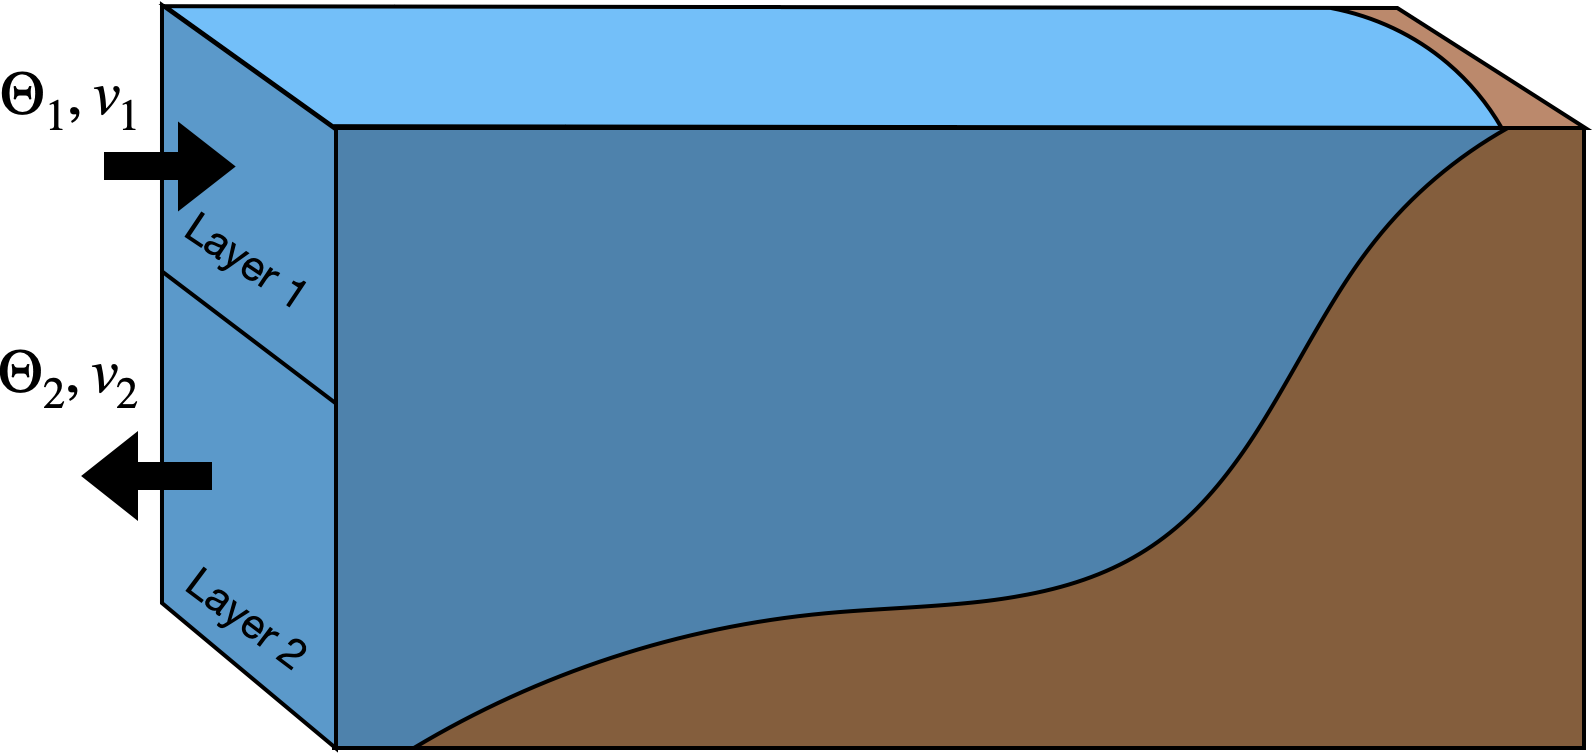

In [2]:
Image('images/3D_Basin_Diagram_layers.png')

A very common framework for thinking about basin-scale budgets is the use of _layered models_.
By this we mean models where the quantities of interest---$\mathbf{u}$, $\Theta$, etc.---are represented as piecewise constant function.
In these cases, we can replace many of the integrals in the budget with simple sums.

#### Example: Two Layer Flow

As an example, let's develop a model very losely inspired by the North Atlantic: flow coming into the basin in layer 1 and out of the basin in layer two. Let's use the Boussinesq assumption and additionally assume steady-state volume ($dV/dt = 0$) and no net volume flux through the surface $F_v^{surf} = 0$. In this case, the volume budget just becomes

$$
F_v^{side} = - \iint_{side} \mathbf{u} \cdot \mathbf{dA} = 0 
$$

Now let's divide the integral into two separate components:
- In layer 1, $\mathbf{u} \cdot \mathbf{dA} < 0$ (inflow)
- In layer 2, $\mathbf{u} \cdot \mathbf{dA} > 0$ (outflow)

We now separate the integral into two parts

\begin{align}
F_v^{side} &= - \iint_1 \mathbf{u} \cdot \mathbf{dA} - \iint_2 \mathbf{u} \cdot \mathbf{dA} \\
&= \psi_1 + \psi_2 = 0
\end{align}

Clearly the two components must be equal and opposite, i.e.
$$ \psi_1 = \psi \ , \ \ \psi_2 = -\psi $$

In this simple two-layer model, the quantity $\psi$ represents the strength of the overturning circulation (covered much more in-depth in {doc}`overturning_circulation`).
It is a volume flux, measured in m$^3$/s, or in Sv (1 Sv = 10$^6$ m$^3$/s).
Note that we did not need to specify the exact details of $\mathbf{u}$ on the boundary or the shape of the boundary.

Now we will look at heat transport by this circulation.
The advective heat transport through the side boundary is given by

$$ F_H^{side} = -  c_p^0 \rho_0 \iint_{side} \mathbf{u} \Theta \cdot \mathbf{dA} \ . $$

This is where the piecewise-constant approximations of the layered model come in.
_We will assume that the temperature is uniform in each layer on the boundary._
I.e., on the side, we have $\Theta = \Theta_1$ in layer 1 and $\Theta = \Theta_2$ in layer 2.
The heat transport becomes

\begin{align}
F_H^{side} &= - c_p^0 \rho_0 \Theta_1 \iint_1 \mathbf{u} \cdot \mathbf{dA} -
   c_p^0 \rho_0 \Theta_1 \iint_2 \mathbf{u} \cdot \mathbf{dA} \\
   &= c_p^0 \rho_0 ( \Theta_1 \psi_1  + \Theta_2 \psi_2 )
\end{align}

Recognizing that $\psi_1 = \psi$ and $\psi_2 = -\psi$, we obtain

$$
F_H^{side} = c_p^0 \rho_0 \psi ( \Theta_1  - \Theta_2 ) \ , 
$$

where  $\Delta \Theta = \Theta_1 - \Theta_2$ is the difference in temperature between the two layers.
This simple yet powerful formula expresses some important fundamental truths about how ocean heat transport works:

- Heat transport can clearly occur even when there is no net volume transport, due to correlations between the strength / direction of the flow and the water temperature.
- The transport is proportional to the strength of the circulation, as measured by $\psi$.
- The transport is proportional to the temperature _difference_ between the inflowing and outflowing water.

## Micro-scale View

The integral budgets above illustrate the concept of heat conservation at the basin scale. We now move down-scale to consider an _infintessimally small_ element of fluid. These differential equations are the most general and flexible way to describe the conservation of mass, heat, and salt. 


## Material Derivative #

The "water parcel" is hypothetical, infinitesimally small fluid element. We imagine the fluid to be composed of an infinite continuum of such parcels, each following its own unique path.
A fluid parcel position at a given time $t$ is given by a three dimensional vector $\mathbf{x}(x,y,z,t)$. The instantaneous rate of change of the position of such a fluid element defines the fluid velocity:

$$
\mathbf{u}  = (u, v, w)\equiv \od{\mathbf{x}}{t}
$$

One way to do fluid mechanics is to keep track of all such fluid elements as they move around; this is called the _Lagrangian_ approach. In Lagrangian fluid mechanics, the rate of change of some fluid property $c$ is just $dc / dt$; it is implicit that we are following the water parcel along its path through space. As you might imagine, Lagrangian fluid mechanics is very difficult because there is actually an infinite number of such paths, and the trajectories quickly become extremely complex. This approach is also incompatible with the way we usually measure the ocean, which involves taking samples at a fixed point in space.


The alternative is the _Eulerian_ approach. Under this approach, the rate of change of a fluid parcel property is proportional to the _local_ rate of change of that property, plus a contribution from the fluid flow transporting that property around (called advection). We can see this mathemtically by using the chain rule:

$$ \od{}{t} c(\mathbf{x}, t) = \pd{c}{t} + \od{\mathbf{x}}{t} \cdot \nabla c 
= \left ( \pd{}{t} + \mathbf{u} \cdot \nabla \right ) c \ . $$

The quantity in parentheses is called the _material derivative_. To distinguish it from an ordinary or partial derivative, we often denote it with a capital $D$:

$$ \td{}{t} = \pd{}{t} + \mathbf{u} \cdot \nabla  $$

It represents a rate of change following a fluid parcel, but in the Eulerian frame of reference. 

### Mass Conservation: Continuity Equation

The mass budget of an infinitesimally small fluid parcel is

$$ \pd{\rho}{t} + \nabla \cdot (\rho \mathbf{u}) = 0 \ . $$

This equation is called the _continuity equation_.

Using some [vector calculus identities](https://en.wikipedia.org/wiki/Vector_calculus_identities), it can be rewritten as.


$$ \pd{\rho}{t} + \mathbf{u} \cdot \nabla \rho + \rho \nabla \cdot \mathbf{u} = 0  $$

or, using the definition of material derivative

$$ \td{\rho}{t} + \rho \nabla \cdot \mathbf{u} = 0  $$



### Continuity Equation in Boussinesq Approximation

In the Boussinesq approximation, fluctuations in density are much smaller than the background density. If we expand the continuity equation interms of background and fluctuations, we obtain

$$ \td{\rho_0}{t} +  \td{\delta \rho}{t} + \rho_0 \nabla \cdot \mathbf{u} + \delta \rho \nabla \cdot \mathbf{u} = 0 $$

The first terms is zero, because $\rho_0$ is constant. Of the remaining nonzero terms, only one has a $\rho_0$ in it. As a "first order" approximation, we find that

$$ \rho_0 \nabla \cdot \mathbf{u} \simeq 0  \ .$$

At this point, we are free to drop the $\rho_0$ factor to give the Boussinesq volume continuity equation:

$$ \nabla \cdot \mathbf{u} = 0  \ .$$

This is also called the incompressibility equation. In the Boussinesq approximation, volume conservation replaced mass conservation.


### Heat Conservation

The left-hand side of the heat conservation equation, representing the rate of change of the heat content of a fluid parcel is

$$ c_p^0 \left [ \pd{}{t}(\rho \Theta) + \nabla \cdot ( \rho \Theta \mathbf{u} ) \right ]$$ 

which we can rewrite using the continuity equation as

$$ c_p^0 \rho \td{\Theta}{t} \ . $$

The right hand side, representing all non-conservative effects, can be written as the sum of the convergence of a molecular diffusive flux $\mathbf{Q}_{diff}$ and a radiative flux $Q_{rad}$:



(Note we have assumed that the radiative flux is only in the vertical direction, a very reasonable approximation for large-scale processes.)

The diffusive flux is given by [Fick's law of diffusion](https://en.wikipedia.org/wiki/Fick%27s_laws_of_diffusion):

$$ \mathbf{Q}_{diff}  = - c_p^0 \rho \kappa_T \nabla T $$

where $T$ is the _in-situ_ temperature and $\kappa_T$ is the molectular diffusivity of heat. The air-sea heat flux acts as a boundary condition for the diffusive flux. 

In the Boussinesq approximation, we replace the $\rho$'s above with $\rho_0$ to obtain:

$$ \td{\Theta}{t} =  \kappa_T \nabla^2 T  - \frac{1}{\rho_0 c_p^0}\pd{Q_{rad}}{z} \ .$$

One complictation of this equation is that molecular diffusion acts on $T$, not $\Theta$. However, we will mostly be thinking about turbulent, rather than molecular, diffusion, for which this is not an issue.


### Salt Conservation

Neglecting the exchange of salt with the surface, salinity is governed just by advection and diffusion

$$  \rho \td{S}{t} =  \nabla \cdot ( \rho \kappa_S \nabla S ) $$

which reduces to 

$$ \td{S}{t} =   \kappa_S  \nabla^2 S  $$

in the Boussinesq approximation.
